In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

In [3]:
from sklearn import linear_model

# Open data

In [4]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie2/100106/100106Final/100106ss2on500cregcdFF20sMpsfkfint169Smith0_4_60TS.mat


In [5]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(10608, 169)

In [6]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie2/100106/100106Final/100106ss2on500cregcdFF20sMpsfkfint169Smith0_4_60IC.nii


In [7]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(189, 125, 10, 169)

In [8]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

In [9]:
Ua=sio.loadmat(filename)
Time_fluo=Ua['TimeFluoOn']
Time_fluo.shape

(1, 3582)

In [8]:
Time_fluoICA=Time_fluo[:,501:6346]

NameError: name 'Time_fluo' is not defined

In [9]:
Time_fluoICA.shape

NameError: name 'Time_fluoICA' is not defined

In [10]:
Time_fluoICA=np.array(range(10608))*0.01

Z-score

In [11]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [12]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [13]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

In [15]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie2/100106/100106Final/100106Xk.mat


In [16]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']

In [17]:
Xk.shape

(10608, 8)

# Open Masks

In [18]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/home/sophie/Downloads/JFRC100106Transformedfullpsftrimmed.nii


In [19]:
filenameM='/home/sophie/Downloads/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [20]:
Dmaps.shape

(189, 125, 10, 169)

In [21]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [22]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [23]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(75) if Num[l]==I]
    CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [24]:
Time_fluoICA.shape

(10608,)

In [29]:
Time_fluoICA=Time_fluoICA.T

In [25]:
Xk.shape

(10608, 8)

In [31]:
Time_fluoICA.shape

(10608,)

In [33]:
Xk=Xk.T

In [1]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmaps=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)        
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
    plt.plot(Time_fluoICA,Xk[:,0]/np.std(Xk[:,0])+2,color=(1,0,0))   
    plt.plot(Time_fluoICA,Xk[:,1]/np.std(Xk[:,1])+2,color=(0.5,0.5,0))
    plt.plot(Time_fluoICA,Xk[:,4]/np.std(Xk[:,4])+6,color=(1,0,1))
    plt.plot(Time_fluoICA,Xk[:,6]/np.std(Xk[:,6])+12,color=(0,1,0))
    plt.plot(Time_fluoICA,Xk[:,7]/np.std(Xk[:,7])+12,color=(0,0,1))
    #plt.plot(Time_fluoICA.T,2*Xk[:,2]/np.max(Xk[:,2])+1.5,color=(1,0,1))    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)

NameError: name 'pylab' is not defined

In [35]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape

/media/sophie2/100106/100106Final/AVG_100106ss2on500cregcpsf.nii


(189, 125, 10)

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [36]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

In [37]:
SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

In [38]:
Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

In [39]:
LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

In [40]:
LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

In [41]:
LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

In [42]:
SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

In [43]:
NewOrder=np.argsort(SmallRegion)

# Last pruning by hand

In [44]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [45]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


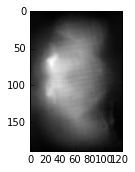

In [46]:
plt.imshow(Dmean[:,:,1],cmap=plt.cm.gray)

In [47]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (15, 2.5)

In [48]:
algorithm = linear_model.LinearRegression()

In [49]:
Sxk=Xk.shape

In [54]:
Xk=Xk.T

In [55]:
X=np.zeros((Sxk[0],6))

In [56]:
X[:,0]=(Xk[:,0]-np.mean(Xk[:,0]))/np.std(Xk[:,0])
X[:,1]=(Xk[:,1]-np.mean(Xk[:,1]))/np.std(Xk[:,1])
X[:,2]=(Xk[:,3]-np.mean(Xk[:,3]))/np.std(Xk[:,3])
X[:,3]=(Xk[:,4]-np.mean(Xk[:,4]))/np.std(Xk[:,4])
X[:,4]=(Xk[:,6]-np.mean(Xk[:,6]))/np.std(Xk[:,6])
X[:,5]=(Xk[:,7]-np.mean(Xk[:,7]))/np.std(Xk[:,7])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


In [57]:
X.shape

(10608, 6)

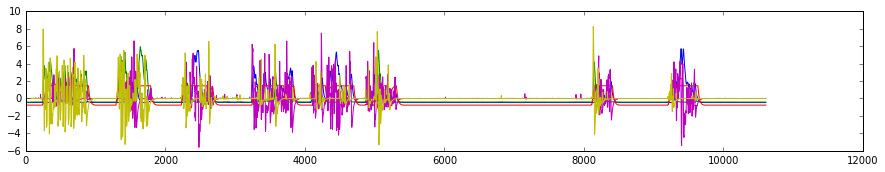

In [58]:
plt.plot(X[:,0])
plt.plot(X[:,1])
plt.plot(X[:,2])
plt.plot(X[:,3])
plt.plot(X[:,4])
plt.plot(X[:,5])

In [59]:
for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,Order[j]]
            D1[:,:,i]=V 

    if (CompMainName[j] != '') and (LargerRegionI[j]!=1) and (LargerRegionI[j]==1 or LargerRegionI[j]==1
                                                             
                                                             
                                                             ):
        print(j)
        print(CompMainName[j])
        for i in range(Nstack):
            plt.subplot(1,5,i+1)
            plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
            plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
            frame1 = plt.gca()
            frame1.axes.get_xaxis().set_visible(False)
            frame1.axes.get_yaxis().set_visible(False)
        
        plt.show()
        
        model = algorithm.fit(X, DT[:,j])
        betas = model.coef_
        rsq = model.score(X,DT[:,j])
        print('left:',betas[0],'right:',betas[1],'walk:',betas[2],'groom:',betas[3])
        print(rsq)
        plt.plot(Time_fluoICA.T,2*DT[:,j]+1.5)
        plt.plot(Time_fluoICA.T,2*(Xk[:,0]-Xk[:,1])/np.max(Xk[:,0]-Xk[:,1]),color=(1,0,0))   
        plt.plot(Time_fluoICA.T,Xk[:,4]/np.max(Xk[:,4])+4,color=(1,0,0))
        plt.show()
        a=raw_input()
    
    Label_ICs.append(a)
    if Label_ICs[j]!='':
        Good_ICs[j]=1

In [60]:
Dmaps.shape

(189, 125, 10, 169)

In [61]:
fn=open('/home/sophie/Desktop/100106GoodICs150.txt','w')
for i in range(S[3]):
    if Good_ICs[i]:
        print>>fn, i
        print>>fn, CompMainName[i]
        print>>fn, Good_ICs[i]

In [62]:
if len(Label_ICs)<S[3]:
    for j in range(S[3]-len(Label_ICs)):
      Label_ICs.append('')  

In [63]:
G=Good_ICs.tolist();

In [64]:
len(Good_ICs)

169

In [65]:
G.count(1)

0

# Plot all components for turning left, right, walking, and grooming

In [66]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((6,S[3]))

In [67]:
np.max(np.max(X[:,6]))

IndexError: index 6 is out of bounds for axis 1 with size 6

In [68]:
X[:,3]=0

In [69]:
for j in range(S[3]):
    model = algorithm.fit(X, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(X,DT[:,j])

In [70]:
RsqUni=np.zeros((6,S[3]))
BetaUni=np.zeros((6,S[3]))
Sx=X.shape

In [71]:
for k in range(6):
    for j in range(S[3]):
        model = algorithm.fit(np.reshape(X[:,k],(Sx[0],1)), DT[:,j])
        BetaUni[k,j] = model.coef_
        RsqUni[k,j] = model.score(np.reshape(X[:,k],(Sx[0],1)),DT[:,j])
   

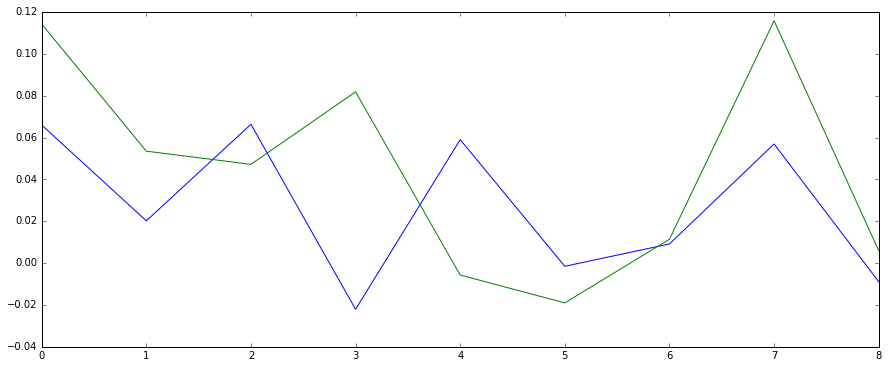

In [607]:
plt.plot(Betas[1,1:10])
plt.plot(Betas[0,1:10])

In [72]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

In [73]:
import random

In [74]:
del Final_map
del Fmaps

NameError: name 'Final_map' is not defined

In [94]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [95]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if RsqUni[0,j]==np.max(RsqUni[0,:]):
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        C[j,0]=1
        C[j,1]=random.uniform(0,1)
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.8*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        J=j
        #print(Indexo[j])
        i=i+1

In [96]:
np.max(RsqUni[0,:])

0.34584815173178862

In [97]:
np.max(np.max(np.max(Final_map)))

0.80000000000000016

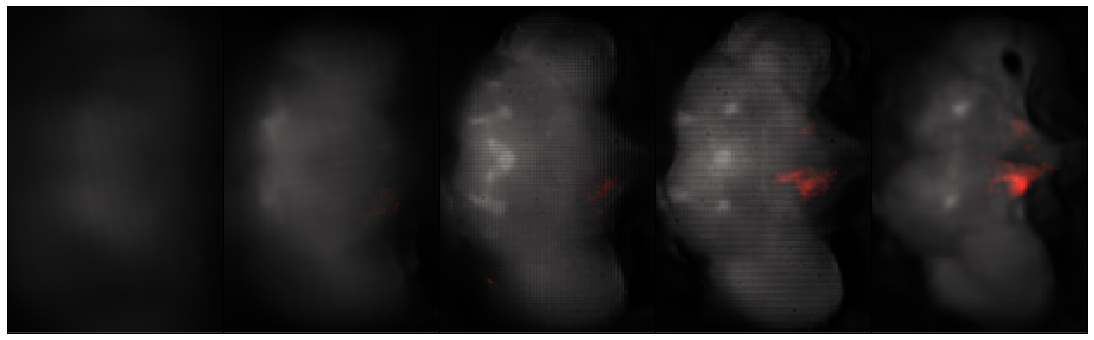

In [98]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        #plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

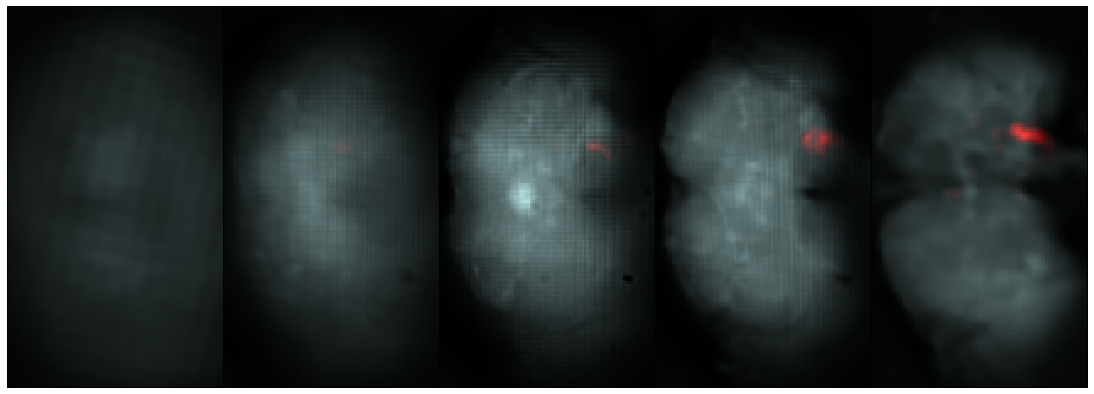

In [138]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

# Plot all components together

In [71]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])

In [72]:
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [73]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

In [74]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if LargerRegionIo[j]<12 and GoodICo[j]:
        C[j,:]=C1[i%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.6*D2o[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #print(Indexo[j])
        i=i+1

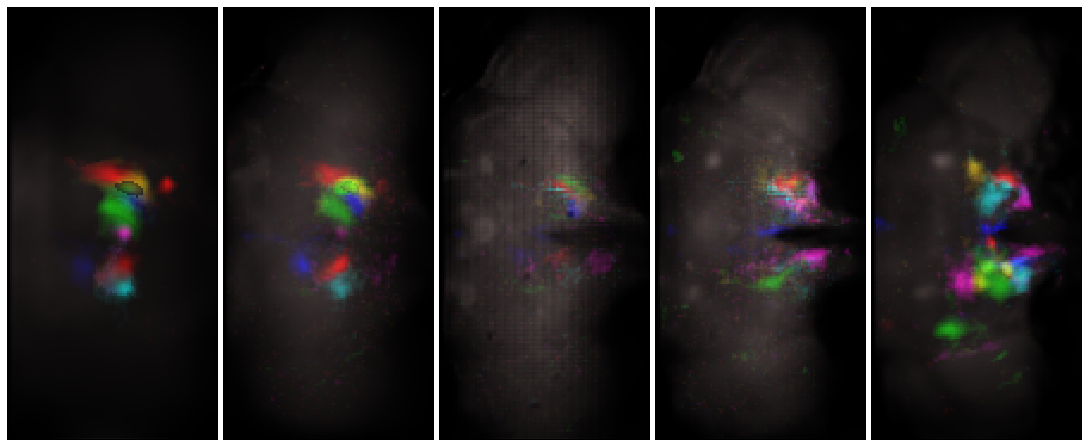

In [75]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

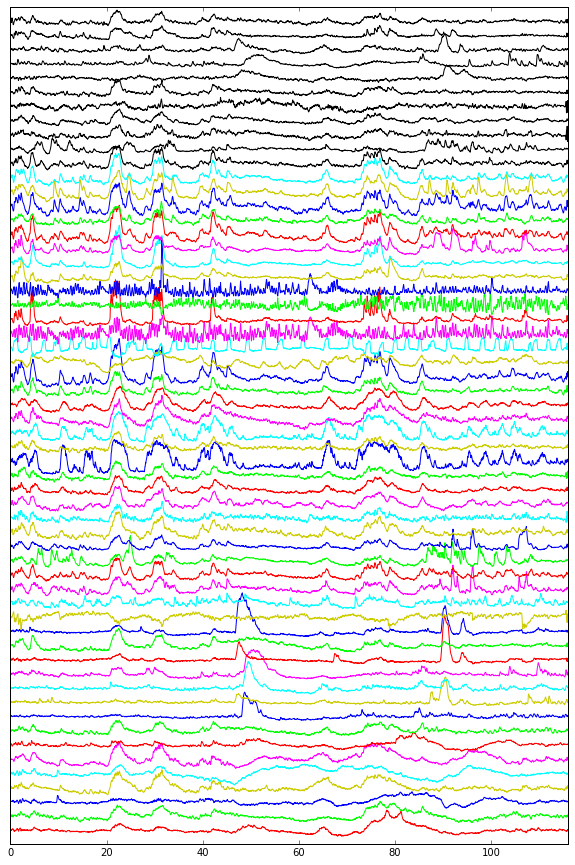

In [123]:
pylab.rcParams['figure.figsize'] = (10, 15)
h=0.5
i=0

for j in range(S[3]):
    if GoodICo[j]:
        plt.plot(Time_fluoICA,(DTo[:,j]+h*i),color=C[j,:]) 
        i=i+1
plt.xlim([np.min(Time_fluoICA),np.max(Time_fluoICA)])
plt.ylim([-0.5,h*i])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
plt.show()

In [124]:
k=0
J=np.zeros(len(GoodICo[GoodICo==1]))
for j in range(len(GoodICo)):
    if GoodICo[j]:
        print(k)
        print([CompMainName[Indexo[j]]])
        J[k]=j
        k=k+1

0
['ME_L']
1
['ME_L']
2
['ME_L']
3
['ME_L']
4
['ME_L']
5
['ME_L']
6
['ME_R']
7
['ME_R']
8
['LO_R']
9
['LO_R']
10
['LO_R']
11
['LO_R']
12
['LO_L']
13
['LO_L']
14
['LO_L']
15
['LOP_L']
16
['AVLP_R']
17
['AVLP_L']
18
['IVLP_R']
19
['IVLP_R']
20
['IVLP_L']
21
['AL_L']
22
['MB_VL_R']
23
['SMP_R']
24
['EB']
25
['PB']
26
['PB']
27
['PB']
28
['PB']
29
['PB']
30
['PB']
31
['SPS_R']
32
['SPS_L']
33
['IPS_R']
34
['IPS_R']
35
['IPS_R']
36
['IPS_R']
37
['IPS_R']
38
['IPS_R']
39
['IPS_R']
40
['IPS_L']
41
['IPS_L']
42
['SAD']
43
['FLA_L']
44
['PRW']
45
['PRW']
46
['PRW']
47
['GNG']
48
['']
49
['']
50
['']
51
['']
52
['']
53
['']
54
['']
55
['']
56
['']
57
['']


In [125]:
Sets=[range(10),range(10,12),range(12,17),range(17,20),20,range(21,23),range(23,25),25]

In [126]:
pylab.rcParams['figure.figsize'] = (12, 6)

for i in range(len(Sets)):
    
    Final_map2=np.zeros([S[0],S[1],3]) 
    Fmaps2=np.zeros([S[0],S[1],3]) 
    Final_map3=np.zeros([S[0],S[1],5,3]) 
    Fmaps3=np.zeros([S[0],S[1],5,3])     
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[j%6][:]
            
            for k in range(3):           
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
                Fmaps2[:,:,k]=0.9*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1],5)))
                Fmaps3[:,:,:,k]=0.9*D2o[:,:,:,J[j]]*C[j,k]/M                
            Final_map2=Final_map2+Fmaps2
            Final_map3=Final_map3+Fmaps3            
                
    else:
        j=Sets[i]
        C[j,:]=C1[j%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
            Fmaps2[:,:,k]=0.8*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
        Final_map2=Final_map2+Fmaps2
                
    Df=np.zeros([S[0],S[1],3]) 
  
    for l in range(3):
        Df[:,:,l]=Final_map2[:,:,l]+np.mean(Dmean,2)/16
    MM=np.max(np.max(Df))

    Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
    a=plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

    plt.show()
                                

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: total size of new array must be unchanged